In [42]:
import nbsetup
import ensemblepy as ep
import numpy as np
import pandas as pd
import seaborn as sns

# Ergodicity

For a good initial summary of ergodicity, please watch Ole Peters TED talk below.

https://www.youtube.com/watch?v=LGqOH3sYmQA

Below we then have the gambler game he describes during the video for you to play with.

In [2]:
def gambler(ensembles, timesteps=100):
    data = {'x': np.arange(timesteps+1)}
    for i in range(ensembles):
        # start with 100 pounds
        series = [100]
        for t in range(timesteps):
            # win you're up 50%
            if np.random.choice([True, False]):
                s = series[t]*1.5
            # lose you're down 40%
            else:
                s = series[t]*0.6
            series.append(s)
        data[i] = np.array(series)
    
    # plot
    df = pd.DataFrame(data)
    g = sns.lineplot(x='x', y='value', ci=None, hue='variable', data=df.melt(id_vars=['x']), legend=0, palette='icefire')
    g.set(yscale='log')

Looking at 2 gamblers paths, we can see over time they are very different.

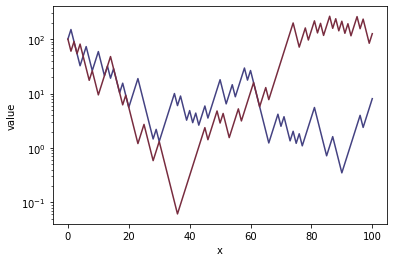

In [3]:
gambler(2)

Then looking at the same for 100 gamblers, it makes it obvious their paths are completely different.

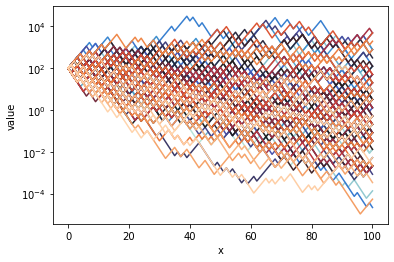

In [4]:
gambler(100)

# Distributions ergodicity

Visually we can think about this as rather than just the value changing over time, the distribution of values changes.


## First looking at an ergodic distribution

Below we plot 5 ensembles of the normal distribution around the value 5. On the left each ensemble is overlaid on top of each other. On the right is the average of all these ensembles, the ergodic distribution. We can immediately see that these broadly match.

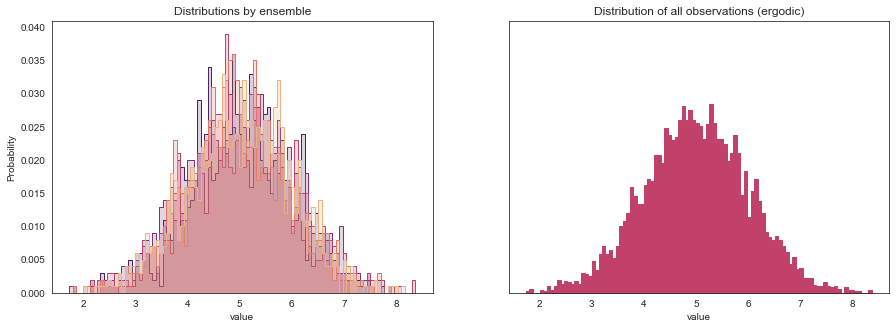

In [5]:
observations = np.array([np.random.normal(5,1,1000) for n in range(5)])
ergodic = ep.ErgodicEnsemble(observations)
ergodic.plot()

It's hard to see how all they all stack up on top of each other. So a ridge plot often makes this easier to see.

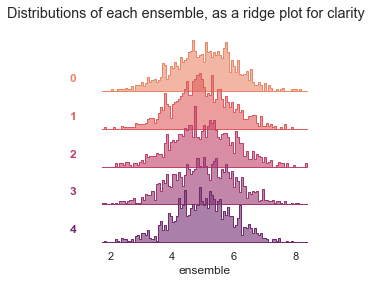

In [6]:
ergodic.ridge()

## Non-ergodic distributions

Now let's try varying the position of the peak of this normal distribution and see what happens.

The key thing to notice here is how the ergodic distribution on the right completely flattens out. This means that the entropy of the distribution on the right is higher (as entropy broadly measures how flat a distribution is) while the distributions on the left are all low entropy and very peaky.

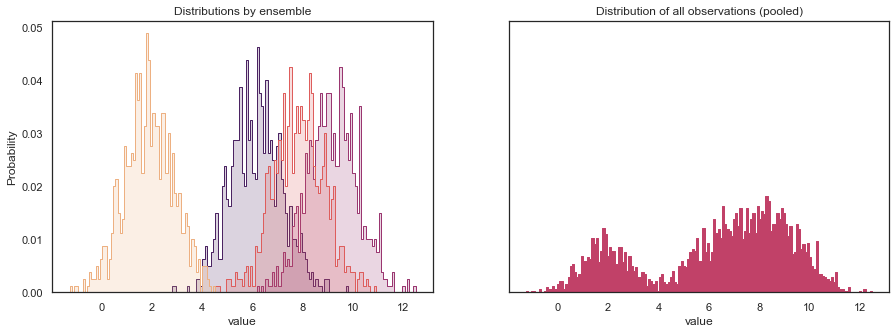

In [73]:
observations = np.array([np.random.normal(np.random.normal(5,3),1,800) for n in range(4)])
non_ergodic = ep.EnsembleComplexity(observations)
non_ergodic.plot()

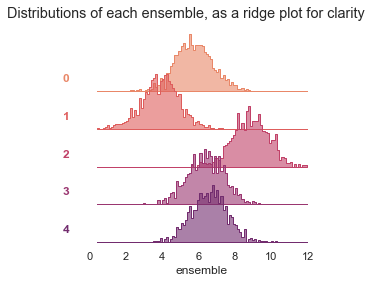

In [8]:
non_ergodic.ridge()

Finally comparing their stats we see concrete differences in their ergodic complexity measures

In [9]:
print("Stats of first ergodic sample:")
ergodic.stats(True)
print("\n\nStats of second non-ergodic sample:")
non_ergodic.stats(True)

Stats of first ergodic sample:
4.077872735597067 ensemble
4.119064897175673 ergodic
0.04119216157860617 divergence
0.025280363179178186 complexity
5 ensembles count
[4.071777370764668, 4.044911043770182, 4.099089910117212, 4.12516915729514, 4.048416196038135] entropies
100 bins count
(1.7386061338496175, 8.360802388656317) bins range
{'minimum': 1000, 'mean': 1000.0, 'max': 1000} observations


Stats of second non-ergodic sample:
3.5494303933524294 ensemble
4.190658922375936 ergodic
0.6412285290235062 divergence
0.31337291486396757 complexity
5 ensembles count
[3.571606520972104, 3.5707076681161714, 3.524433017184265, 3.534824048962192, 3.5455807115274145] entropies
100 bins count
(0.3739006152029831, 11.945550445014035) bins range
{'minimum': 1000, 'mean': 1000.0, 'max': 1000} observations
